# Trabajo Práctico n° 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('1000_Companies.csv')

In [6]:
df.head(2)

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Análisis Exploratorio

### Distribuciones de las variables

In [8]:
df

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [10]:
df.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

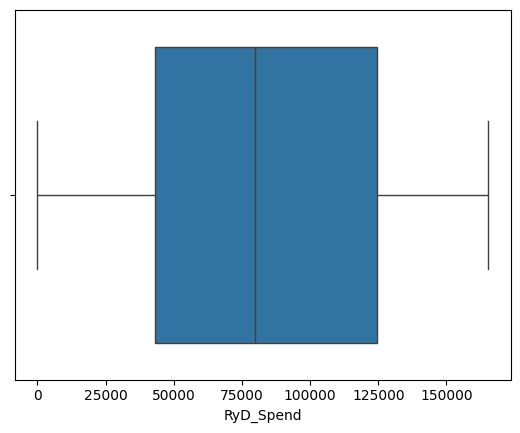

In [12]:
import seaborn as sns

sns.boxplot(data = df, x='RyD_Spend')

plt.show()

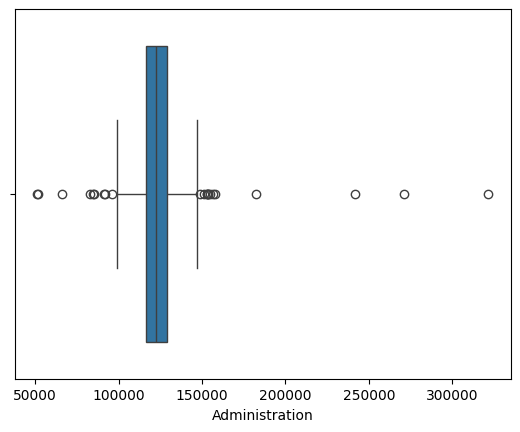

In [13]:
sns.boxplot(data = df, x='Administration')

plt.show()

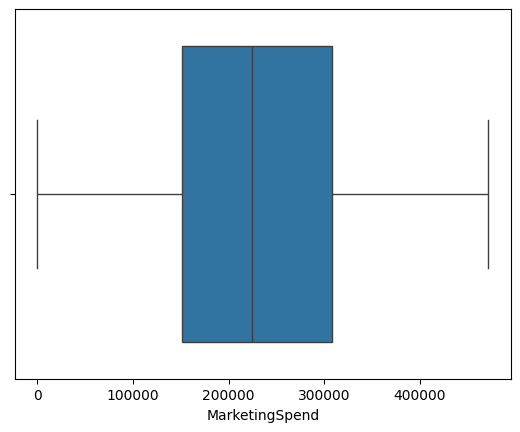

In [14]:
sns.boxplot(data = df, x='MarketingSpend')
plt.show()

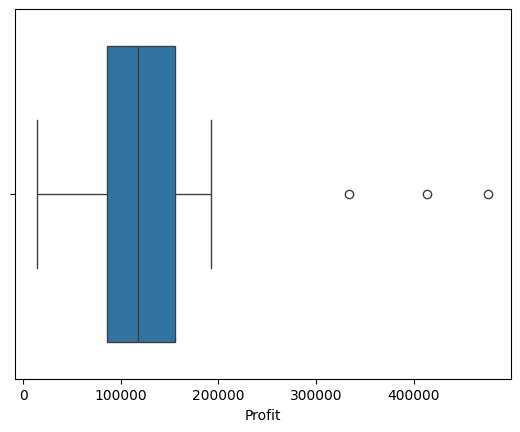

In [15]:
sns.boxplot(data = df, x='Profit')
plt.show()

### Escalado

Debido a la cantidad de valores atípicos se decidió utilizar un escalado robusto el cual es menos sensible a outliers que el escalado estándar.

In [17]:
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

arr = escalador.fit_transform(df.drop('State', axis=1))

arr

array([[ 1.0482591 ,  1.15824021,  1.57273795,  1.07160958],
       [ 1.01449049,  2.31676863,  1.39537165,  1.0648633 ],
       [ 0.90211841, -1.70229835,  1.16662251,  1.05421231],
       ...,
       [ 0.24962224,  9.56157435,  0.0166959 ,  4.25532644],
       [ 0.59547907, 15.94044033,  0.36365826,  3.10654288],
       [ 0.99711246, 11.88294933,  0.45111425,  5.15329341]])

In [18]:
df_escalado = pd.DataFrame(arr)

df_escalado.columns = df.drop('State', axis=1).columns

df_escalado

,RyD_Spend,Administration,MarketingSpend,Profit
0,1.048259,1.158240,1.572738,1.071610
1,1.014490,2.316769,1.395372,1.064863
2,0.902118,-1.702298,1.166623,1.054212
3,0.790815,-0.300019,1.009296,0.937195
4,0.763016,-2.482699,0.900969,0.697167
...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130
996,0.675421,0.637557,0.665857,0.670580
997,0.249622,9.561574,0.016696,4.255326
998,0.595479,15.940440,0.363658,3.106543


In [19]:
df_escalado['State'] = df['State']

df_escalado

,RyD_Spend,Administration,MarketingSpend,Profit,State
0,1.048259,1.158240,1.572738,1.071610,New York
1,1.014490,2.316769,1.395372,1.064863,California
2,0.902118,-1.702298,1.166623,1.054212,Florida
3,0.790815,-0.300019,1.009296,0.937195,New York
4,0.763016,-2.482699,0.900969,0.697167,Florida
...,...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130,California
996,0.675421,0.637557,0.665857,0.670580,California
997,0.249622,9.561574,0.016696,4.255326,California
998,0.595479,15.940440,0.363658,3.106543,California


### Tipos de Datos

In [20]:
df_escalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   Profit          1000 non-null   float64
 4   State           1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### Análisis de Valores Faltantes

En nuestro dataset no encontramos valores nulos.

In [21]:
df_escalado.isnull().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
Profit            0
State             0
dtype: int64

## Árboles de Decisión - Regresión

In [22]:
df.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [31]:
X = df.drop(['State', 'Profit'], axis=1)
y = df.Profit

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn import tree
from sklearn.model_selection import train_test_split

In [35]:
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=13 )

In [38]:
regressor_tree = clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [44]:
predictions

array([125957.1148    , 111348.65553333,  89938.86714231, 125957.1148    ,
       159597.44544167,  89938.86714231, 154940.9632069 , 137471.50511852,
        86610.56621389,  89938.86714231, 168594.33475862, 163949.726275  ,
       103172.67503846, 108746.74883846,  89938.86714231, 159597.44544167,
       116454.16481111, 103172.67503846, 116454.16481111, 103172.67503846,
        76760.86591176, 125957.1148    ,  64608.07982   ,  70831.92971545,
       168594.33475862, 163949.726275  , 176531.83962105, 133540.4188625 ,
       121860.0050087 , 159597.44544167, 146110.06177778, 111348.65553333,
       163949.726275  , 142218.75780286,  64608.07982   ,  89938.86714231,
        80441.64297136,  73418.48614375, 116454.16481111, 168594.33475862,
        59679.20024821,  89938.86714231, 121860.0050087 , 142218.75780286,
       168594.33475862, 146110.06177778, 150853.29292609, 137471.50511852,
       142218.75780286,  73418.48614375, 116454.16481111,  64608.07982   ,
       172654.05198077, 1

In [40]:
feature_list = list(x_train.columns)

In [41]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 83223.50
|   |--- RyD_Spend <= 39625.00
|   |   |--- RyD_Spend <= 19379.50
|   |   |   |--- RyD_Spend <= 771.14
|   |   |   |   |--- MarketingSpend <= 22586.53
|   |   |   |   |   |--- Administration <= 93585.04
|   |   |   |   |   |   |--- value: [35673.41]
|   |   |   |   |   |--- Administration >  93585.04
|   |   |   |   |   |   |--- value: [42559.73]
|   |   |   |   |--- MarketingSpend >  22586.53
|   |   |   |   |   |--- value: [14681.40]
|   |   |   |--- RyD_Spend >  771.14
|   |   |   |   |--- RyD_Spend <= 10224.00
|   |   |   |   |   |--- Administration <= 111290.70
|   |   |   |   |   |   |--- value: [51878.00]
|   |   |   |   |   |--- Administration >  111290.70
|   |   |   |   |   |   |--- value: [56110.07]
|   |   |   |   |--- RyD_Spend >  10224.00
|   |   |   |   |   |--- Administration <= 112714.60
|   |   |   |   |   |   |--- value: [59679.20]
|   |   |   |   |   |--- Administration >  112714.60
|   |   |   |   |   |   |--- value: [64608.08]
|   |   |-

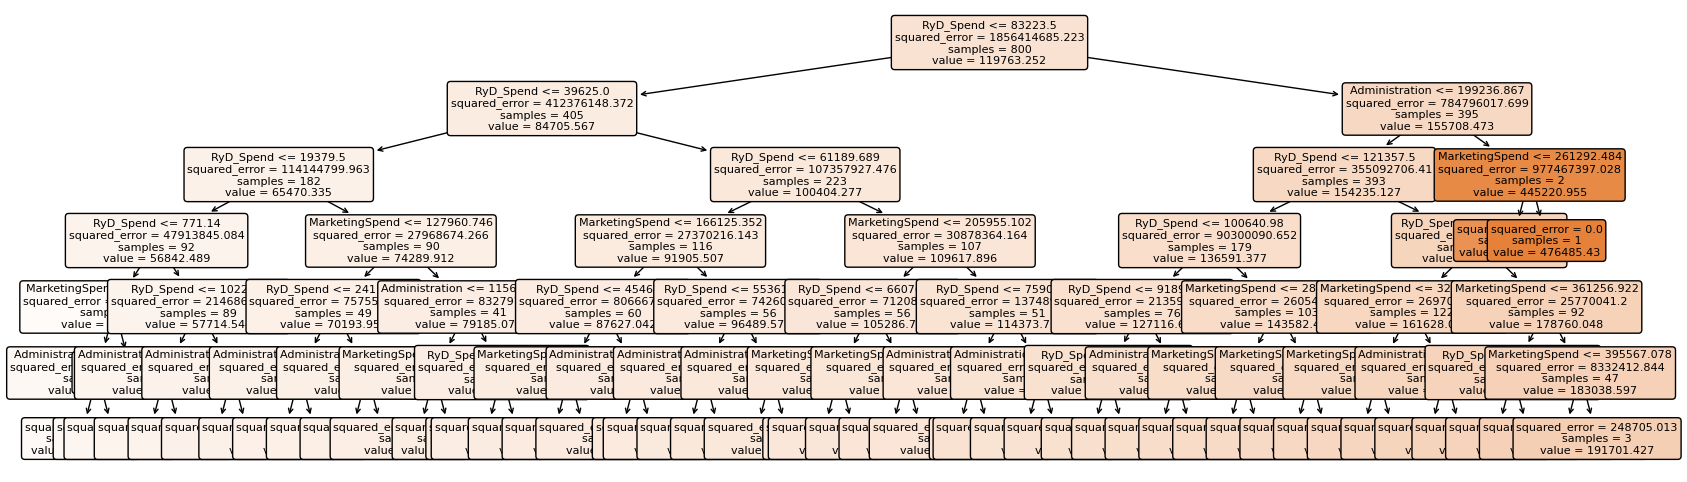

In [43]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

## 3 - Descargar conjuntos de datos PokemonDB.csv para realizar el trabajo practico. Analizar los atributos del conjunto de datos

In [45]:
pokemones = pd.read_csv('PokemonDB.csv')
pokemones

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


### Distribuciones de las variables

In [ ]:
# Hacer gtrafico de densidad para cada numerica

### Valores Atípicos

In [ ]:
#

### Tipos de Datos

### Matriz de correlación

### Scatterplots

## 4 

Realizar la estimación del atributo Type utilizando árboles de decisión (Clasificación) 
analizando los parámetros máximo profundidad, número mínimo de observaciones, 
número mínimo de observaciones por separación y criterio de separación. Graficar el 
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos 
conjuntos de test (Precisión, Exhaustividad y Exactitud).

In [46]:
pokemones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


## 5 Clasificacion Bayes Ingenuo
Estimar Type

## 6 K-NN
Estimar Type